<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Ecuaciones-Diferenciales-Parciales-2/blob/main/M%C3%A9todo%20de%20Crank-Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Crank-Nicolson**

Método para que podamos resolver la siguiente ecuación del calor:

\frac{\partial u}{\partial t} = \frac{\partial^2u}{\partial x^2}

Con las siguientes condiciones de frontera:

i) u = 0 para x = 0, x = 1, t \geq 0

ii) u = 1-4(x - 1/2)^2 para t = 0 y 0 \leq x \leq 1

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Necesario para 3D
from matplotlib import cm #Colormap
from tabulate import tabulate #Para hacer tablas

In [2]:
def f(x):
  return 1-4*(x-0.5)**2

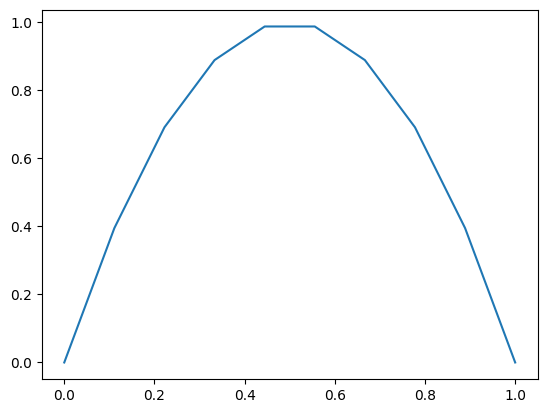

In [3]:
x = np.linspace(0,1,10)
plt.plot(x, f(x))

In [4]:
def tridiagonal(n, a, b):
   return sp.Matrix ([
     [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
     for i in range(n)
   ])

In [5]:
r = 1

In [6]:
A = tridiagonal(9, 2 + 2*r, -r)

In [7]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [8]:
B = tridiagonal(9, 2 - 2*r, -r)

In [9]:
B

Matrix([
[ 0, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  0, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  0, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  0, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  0, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  0, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  0, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  0, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  0]])

In [10]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [11]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [12]:
def crank_nicolson(A, B, b, j):
  b_1 = B*b
  S = []

  for i in range(j):
    sol = A.LUsolve(b_1) #u^{n+1}
    S.append(sol.T) #Guardar fila (como vector renglón)
    b_1 = B*sol #Preparar siguiente paso
  #Convertir lista de vectores sympy a una matriz sympy
  return sp.Matrix(S) #Matriz resultado

In [15]:
j = 50 #Número de pasos en el tiempo

In [14]:
U = crank_nicolson(A, B, b, j)

In [17]:
data = [list(U.row(i)) for i in range(5)]
print(tabulate(data, tablefmt = "grid"))

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| -0.301436 | -0.565746 | -0.761547 | -0.880442 | -0.920221 | -0.880442 | -0.761547 | -0.565746 | -0.301436 |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|  0.26763  |  0.504776 |  0.688489 |  0.802994 |  0.841718 |  0.802994 |  0.688489 |  0.504776 |  0.26763  |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| -0.23989  | -0.454784 | -0.623126 | -0.729952 | -0.766473 | -0.729952 | -0.623126 | -0.454784 | -0.23989  |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|  0.21645  |  0.411015 |  0.564592 |  0.662619 |  0.696285 |  0.662619 |  0.564592 |  0.411015 |  0.21645  |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| -0.19578

In [18]:
U_np = np.array(U.tolist(), dtype = float)

In [19]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.05, j) #Debe coincidir con el tamaño de j por k(tiempo)
X, Y = np.meshgrid(x, y)

**Ejercicio 1.** Obtenga una tabla y use esta para verificar que su código es correcto. Observe hasta que valor de t llega.

In [35]:
# Parámetros del problema
L = 1.0  # Longitud del dominio
T = 0.01  # Tiempo final
nx = 9   # Número de nodos internos en x
nt = 50  # Número de pasos en tiempo

# Discretización
dx = L / (nx + 1)
dt = T / nt
r = dt / (dx**2)

print("TABLA DE SOLUCIONES NUMÉRICAS")
print("="*60)

# Calcular soluciones
U = crank_nicolson(A, B, b, nt)

# Define x_nodes for table headers
x_nodes = np.linspace(dx, L - dx, nx)

# Crear tabla para los primeros 5 pasos de tiempo
headers = ["t/x"] + [f"{x:.2f}" for x in x_nodes]
table_data = []

for i in range(min(6, nt)):  # Primeros 6 pasos de tiempo
    t_val = i * dt
    row = [f"{t_val:.4f}"] + [f"{float(U[i,j]):.6f}" for j in range(nx)]
    table_data.append(row)

print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".6f"))

TABLA DE SOLUCIONES NUMÉRICAS
+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|      t/x |      0.10 |      0.20 |      0.30 |      0.40 |      0.50 |      0.60 |      0.70 |      0.80 |      0.90 |
+==========+===========+===========+===========+===========+===========+===========+===========+===========+===========+
| 0.000000 | -0.301436 | -0.565746 | -0.761547 | -0.880442 | -0.920221 | -0.880442 | -0.761547 | -0.565746 | -0.301436 |
+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| 0.000200 |  0.267630 |  0.504776 |  0.688489 |  0.802994 |  0.841718 |  0.802994 |  0.688489 |  0.504776 |  0.267630 |
+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| 0.000400 | -0.239890 | -0.454784 | -0.623126 | -0.729952 | -0.766473 | -0.729952 | -0.623126 | -0.454784 | -0.239890 |
+-

**Ejercicio 2.** Use su código para graficar en un mismo panel su solución númerica y la solución real.

In [39]:
print("COMPARACIÓN CON SOLUCIÓN REAL")
print("="*60)

def solucion_real(x, t, n_terms=50):
    """Solución analítica de la ecuación de calor"""
    u = 0
    for n in range(1, n_terms + 1):
        lambda_n = n * np.pi / L
        # Coeficiente de Fourier
        integral = 0
        for k in range(100):  # Integración numérica
            xi = k * L / 100
            integral += f(xi) * np.sin(lambda_n * xi) * (L/100)

        cn = (2/L) * integral
        u += cn * np.sin(lambda_n * x) * np.exp(-lambda_n**2 * t)
    return u

# Calcular solución real en los mismos puntos
U_real_np = np.zeros((nt, nx))
for i in range(nt):
    t_val = i * dt
    for j in range(nx):
        U_real_np[i, j] = solucion_real(x_nodes[j], t_val)

# Convertir solución numérica a numpy
U_np = np.array(U.tolist(), dtype=float)

# Calcular error
error = np.abs(U_np - U_real_np)
error_max = np.max(error)
error_promedio = np.mean(error)

print(f"Error máximo: {error_max:.6f}")
print(f"Error promedio: {error_promedio:.6f}")

# Tabla comparativa para algunos puntos
print("\nComparación en algunos puntos seleccionados:")
comparison_headers = ["(x,t)", "Numérico", "Real", "Error"]
comparison_data = []

# Puntos para comparar
points_to_compare = [(0, 0), (2, 10), (4, 25), (6, 40)]  # (índice_x, índice_t)

for idx_x, idx_t in points_to_compare:
    if idx_t < nt and idx_x < nx:
        x_val = x_nodes[idx_x]
        t_val = idx_t * dt
        num_val = U_np[idx_t, idx_x]
        real_val = U_real_np[idx_t, idx_x]
        err_val = abs(num_val - real_val)

        comparison_data.append([
            f"({x_val:.2f}, {t_val:.4f})",
            f"{num_val:.6f}",
            f"{real_val:.6f}",
            f"{err_val:.6f}"
        ])

print(tabulate(comparison_data, headers=comparison_headers, tablefmt="grid"))

COMPARACIÓN CON SOLUCIÓN REAL
Error máximo: 1.920225
Error promedio: 0.702946

Comparación en algunos puntos seleccionados:
+----------------+------------+----------+----------+
| (x,t)          |   Numérico |     Real |    Error |
+================+============+==========+==========+
| (0.10, 0.0000) |  -0.301436 | 0.360012 | 0.661449 |
+----------------+------------+----------+----------+
| (0.30, 0.0020) |  -0.284209 | 0.824    | 1.10821  |
+----------------+------------+----------+----------+
| (0.50, 0.0050) |   0.080815 | 0.96     | 0.879185 |
+----------------+------------+----------+----------+
| (0.70, 0.0080) |  -0.015041 | 0.776234 | 0.791275 |
+----------------+------------+----------+----------+


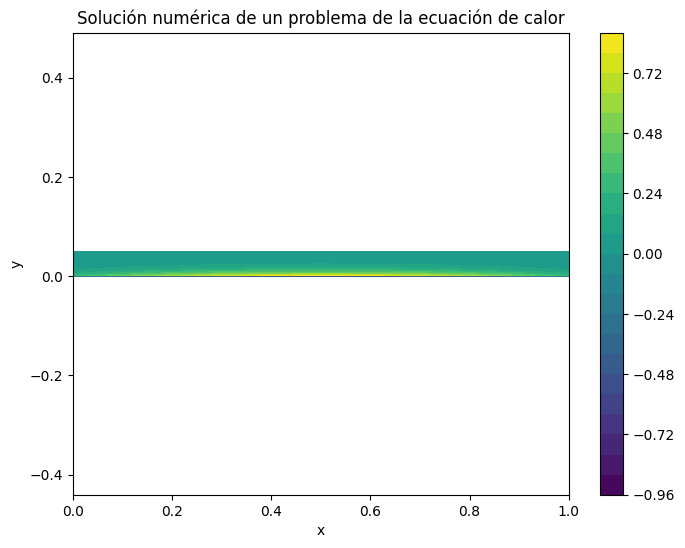

In [40]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de la ecuación de calor')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

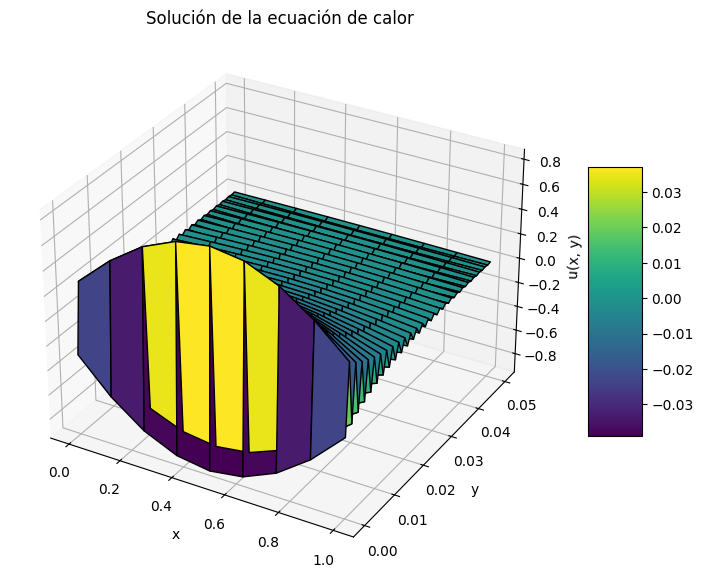

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación de calor')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()